# Sales Data Analysis

## Introduction

Welcome to this Jupyter notebook where we explore and analyze sales data to gain valuable insights. In this analysis, we'll address various questions related to the sales data and provide actionable conclusions. The dataset used for this analysis contains information about sales transactions, including details such as product sales, cities, and timestamps.

### Questions Explored:

1. **How to gather data from files?**
   - We'll begin by understanding the process of extracting data from files, ensuring a smooth start to our analysis.

2. **How to clear data?**
   - Data cleaning is a crucial step to ensure the accuracy and reliability of our analysis. We'll discuss techniques for cleaning the dataset, handling missing values, and ensuring data quality.

3. **What was the best month for sales? How much was earned that month?**
   - We'll identify the highest-performing month in terms of sales revenue and quantify the earnings during that period.

4. **What city has the highest number of sales?**
   - Analyzing sales performance across different cities to identify the top-performing location.

5. **What time should we display advertisements to maximize the likelihood of customer's buying products?**
   - Exploring the optimal timing for displaying advertisements to maximize the chances of customers making purchases.

6. **What products are most often sold together?**
   - Investigating product pairs that are frequently sold together, providing insights for targeted marketing and promotions.

Throughout this analysis, we'll utilize Python and its data analysis libraries, such as Pandas and Matplotlib, to visualize and interpret the findings. Let's dive into the world of sales data and extract meaningful information to inform business strategies.

In [ ]:
## Question 1: How to gather data from files?

In [1]:
import pandas as pd
import os

In [2]:
## Entry 12 months data - Method 1

data1=pd.read_csv("Sales Data/Sales_January_2019.csv", sep=",")
data2=pd.read_csv("Sales Data/Sales_February_2019.csv", sep=",")
data3=pd.read_csv("Sales Data/Sales_March_2019.csv", sep=",")
data4=pd.read_csv("Sales Data/Sales_April_2019.csv", sep=",")
data5=pd.read_csv("Sales Data/Sales_May_2019.csv", sep=",")
data6=pd.read_csv("Sales Data/Sales_June_2019.csv", sep=",")
data7=pd.read_csv("Sales Data/Sales_July_2019.csv", sep=",")
data8=pd.read_csv("Sales Data/Sales_August_2019.csv", sep=",")
data9=pd.read_csv("Sales Data/Sales_September_2019.csv", sep=",")
data10=pd.read_csv("Sales Data/Sales_October_2019.csv", sep=",")
data11=pd.read_csv("Sales Data/Sales_November_2019.csv", sep=",")
data12=pd.read_csv("Sales Data/Sales_December_2019.csv", sep=",")

print(f"data1: {data1.shape} and data2: {data2.shape}")

data1: (9723, 6) and data2: (12036, 6)


In [3]:
## to test the command

new_data=pd.merge(data1, data2, how='outer', indicator=True)
new_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,_merge
0,141234,iPhone,1,700,01/22/19 21:25,"944 Walnut St, Boston, MA 02215",left_only
1,141235,Lightning Charging Cable,1,14.95,01/28/19 14:15,"185 Maple St, Portland, OR 97035",left_only
2,141236,Wired Headphones,2,11.99,01/17/19 13:33,"538 Adams St, San Francisco, CA 94016",left_only
3,141237,27in FHD Monitor,1,149.99,01/05/19 20:33,"738 10th St, Los Angeles, CA 90001",left_only
4,141238,Wired Headphones,1,11.99,01/25/19 11:59,"387 10th St, Austin, TX 73301",left_only


In [4]:
## Entry & Merge 12 months data - Method 2

datas = [data for data in os.listdir("Sales Data")]


alldataset=pd.DataFrame()

for data in datas:
    print(data)
    dataset=pd.read_csv("Sales Data/" + data) 
    #alldataset=alldataset.merge(dataset, how="outer", indicator=True) # method 1 not working
    alldataset=pd.concat([alldataset, dataset]) # method 2
    
print("\n", alldataset.shape)
alldataset.head()

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv

 (186850, 6)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [5]:
## save in csv file

alldataset.to_csv("alldataset.csv", index=False) # to remove additional row indexing

In [6]:
## read merged file

dataset=pd.read_csv("alldataset.csv", sep=",")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


## Question 2: How to clear data?

In [7]:
nan_dataset=dataset[dataset.isna().any(axis=1)]
print(nan_dataset)

dataset.dropna(inplace=True, how="all") # remove empty cells

print(dataset.shape)

dataset.head()

       Order ID Product Quantity Ordered Price Each Order Date  \
1           NaN     NaN              NaN        NaN        NaN   
356         NaN     NaN              NaN        NaN        NaN   
735         NaN     NaN              NaN        NaN        NaN   
1433        NaN     NaN              NaN        NaN        NaN   
1553        NaN     NaN              NaN        NaN        NaN   
...         ...     ...              ...        ...        ...   
185176      NaN     NaN              NaN        NaN        NaN   
185438      NaN     NaN              NaN        NaN        NaN   
186042      NaN     NaN              NaN        NaN        NaN   
186548      NaN     NaN              NaN        NaN        NaN   
186826      NaN     NaN              NaN        NaN        NaN   

       Purchase Address  
1                   NaN  
356                 NaN  
735                 NaN  
1433                NaN  
1553                NaN  
...                 ...  
185176              NaN  

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [8]:
## find and remove 'or' from "order date"

or_dataset=dataset[dataset["Order Date"].str[0:2]=="Or"]
print(or_dataset.head())

dataset=dataset[dataset["Order Date"].str[0:2]!="Or"]
dataset.head()

      Order ID  Product  Quantity Ordered  Price Each  Order Date  \
519   Order ID  Product  Quantity Ordered  Price Each  Order Date   
1149  Order ID  Product  Quantity Ordered  Price Each  Order Date   
1155  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2878  Order ID  Product  Quantity Ordered  Price Each  Order Date   
2893  Order ID  Product  Quantity Ordered  Price Each  Order Date   

      Purchase Address  
519   Purchase Address  
1149  Purchase Address  
1155  Purchase Address  
2878  Purchase Address  
2893  Purchase Address  


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


In [9]:
## Make required column into int

dataset["Quantity Ordered"]=pd.to_numeric(dataset["Quantity Ordered"]) # make int
dataset["Price Each"]=pd.to_numeric(dataset["Price Each"]) # make float

dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"


## Question 3: What was the best month for sales? How much was earned that month?

In [11]:
## Data augmentation by adding extra columns

dataset["Month"]=dataset["Order Date"].str[0:2] # add a extra column
dataset["Month"]=dataset["Month"].astype("int32")
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4


In [12]:
## Add column for Sales

dataset["Sales"]=dataset["Quantity Ordered"]*dataset["Price Each"]

dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


In [13]:
## group all month data

dataset.groupby("Month").sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\3045001021.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby("Month").sum()


,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


### Ans: December with 4613443.34

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\4293178492.py:6: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  results=dataset.groupby("Month").sum()


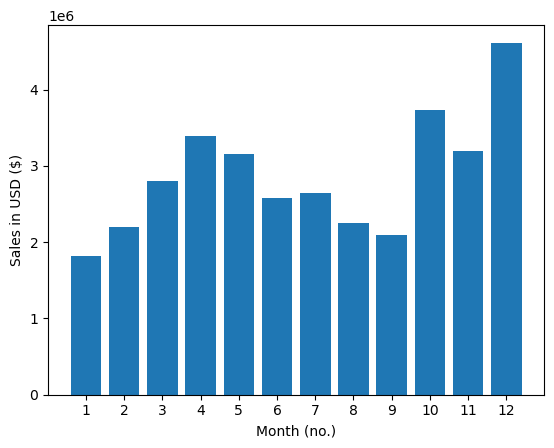

In [14]:
## Graphical Representation

import matplotlib.pyplot as plt

months=range(1, 13)
results=dataset.groupby("Month").sum()
plt.bar(months, results["Sales"])
plt.xticks(months)
plt.ylabel("Sales in USD ($)")
plt.xlabel("Month (no.)")
plt.show()

In [30]:
dataset=dataset.drop(columns=["City", "Country"]) #to remove column

## Question 4: What city is highest number of sales?

In [34]:
## City Column

def getcol(x):
    x1=x.split(",")[1]
    x2=x.split(',')[2][0:3]
    return x1+" "+x2

#dataset["City"]=dataset["Purchase Address"].apply(lambda x: x.split(",")[1]) # need to understand
dataset["City"]=dataset["Purchase Address"].apply(lambda x: getcol(x))
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA


In [36]:
dataset.groupby("City").sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\630436318.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby("City").sum()


,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta GA,16602,2779908.20,104794,2795498.58
Austin TX,11153,1809873.61,69829,1819581.75
Boston MA,22528,3637409.77,141112,3661642.01
Dallas TX,16730,2752627.82,104620,2767975.40
Los Angeles CA,33289,5421435.23,208325,5452570.80
New York City NY,27932,4635370.83,175741,4664317.43
Portland ME,2750,447189.25,17144,449758.27
Portland OR,11303,1860558.22,70621,1870732.34
San Francisco CA,50239,8211461.74,315520,8262203.91


### Ans: San Francisco with 8262203.91

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\947805547.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result2=dataset.groupby("City").sum()


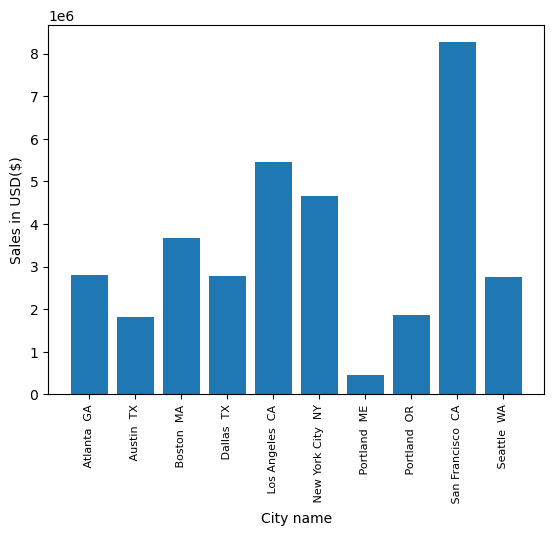

In [39]:
result2=dataset.groupby("City").sum()
#City=dataset["City"].unique() # cant work as give in another order
City=[city for city, data in dataset.groupby("City")]
plt.bar(City, result2["Sales"])
plt.xticks(City, rotation="vertical", size=8)
plt.ylabel("Sales in USD($)")
plt.xlabel("City name")
plt.show()

## Question 5: What time should we display advertisements to maximize likelihood  of customer's buying products?

In [43]:
## add column Time

dataset["Time"]=dataset["Order Date"].apply(lambda x: x.split(" ")[1])
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,08:46
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22:30
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14:38
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14:38
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,09:27


In [46]:
dataset["Time"]=pd.to_datetime(dataset["Time"]).dt.hour
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [50]:
dataset.groupby("Time").sum()

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\1399212833.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  dataset.groupby("Time").sum()


,Quantity Ordered,Price Each,Month,Sales
Time,,,,
0,4428,709296.70,27554,713721.27
1,2619,458490.00,16657,460866.88
2,1398,233833.64,8507,234851.44
3,928,144726.42,5904,145757.89
4,937,162058.18,6148,162661.01
5,1493,229621.21,9301,230679.82
6,2810,445000.11,17539,448113.00
7,4556,740568.11,28850,744854.12
8,7002,1185970.62,43626,1192348.97


### Ans: Between 19:00-20:00 with 14470 quantity ordered

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\317920513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  result3=dataset.groupby("Time").sum()


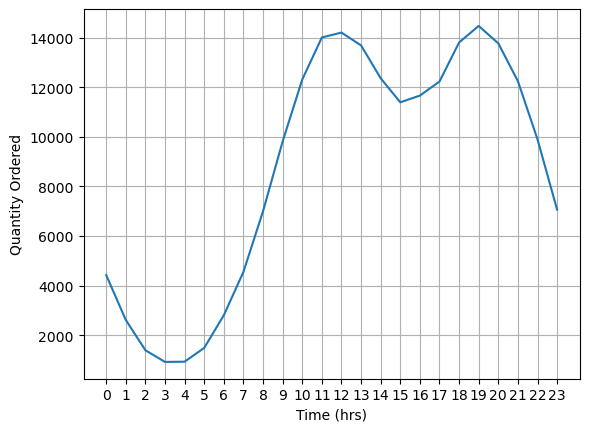

In [60]:
result3=dataset.groupby("Time").sum()
Time=range(0, 24)
plt.plot(Time, result3["Quantity Ordered"])
plt.xticks(Time)
plt.xlabel("Time (hrs)")
plt.ylabel("Quantity Ordered")
plt.grid()
plt.show()

## Question 6: What products are most often sold together?

In [62]:
## Order ID into Int

dataset["Order ID"]=dataset["Order ID"].apply(lambda x: int(x))
dataset.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas TX,8
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston MA,22
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,9


In [70]:
## DataFrame with duplicate only

dup_dataset=dataset[dataset["Order ID"].duplicated(keep=False)]
print(dup_dataset.shape)
dup_dataset.head(20)

(14649, 10)


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
31,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11
32,176586,AAA Batteries (4-pack),2,2.99,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco CA,17
33,176586,Google Phone,1,600.00,04/10/19 17:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco CA,17
119,176672,Lightning Charging Cable,1,14.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,14.95,New York City NY,11
120,176672,USB-C Charging Cable,1,11.95,04/12/19 11:07,"778 Maple St, New York City, NY 10001",4,11.95,New York City NY,11


In [71]:
## new Column with merged duplicated order ID

dup_dataset["Grouped"]=dup_dataset.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))

dup_dataset.head()

C:\Users\HP\AppData\Local\Temp\ipykernel_13780\3848418955.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dup_dataset["Grouped"]=dup_dataset.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))


,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Sales,City,Time,Grouped
3,176560,Google Phone,1,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,14,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles CA,14,"Google Phone,Wired Headphones"
18,176574,Google Phone,1,600.00,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1,11.95,04/03/19 19:42,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles CA,19,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1,99.99,04/07/19 11:31,"823 Highland St, Boston, MA 02215",4,99.99,Boston MA,11,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [74]:
## Drop duplicated rows

dup_dataset=dup_dataset[["Order ID", "Grouped"]].drop_duplicates()
dup_dataset.head()

,Order ID,Grouped
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [80]:
## Very Special Method

from itertools import combinations
from collections import Counter

count=Counter()
for row in dup_dataset["Grouped"]:
    row_list=row.split(',')
    count.update(Counter(combinations(row_list, 2)))

print(count.most_common(10)) 
#print(count)

[(('iPhone', 'Lightning Charging Cable'), 1005), (('Google Phone', 'USB-C Charging Cable'), 987), (('iPhone', 'Wired Headphones'), 447), (('Google Phone', 'Wired Headphones'), 414), (('Vareebadd Phone', 'USB-C Charging Cable'), 361), (('iPhone', 'Apple Airpods Headphones'), 360), (('Google Phone', 'Bose SoundSport Headphones'), 220), (('USB-C Charging Cable', 'Wired Headphones'), 160), (('Vareebadd Phone', 'Wired Headphones'), 143), (('Lightning Charging Cable', 'Wired Headphones'), 92)]


### Ans: iPhone and Lightning Charging Cable